# 이미지 다중분류

In [26]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# 데이터 로드

In [3]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [6]:
type(y_train)

numpy.ndarray

In [7]:
y_train[:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [8]:
np.random.seed(2022)
sample = 3

idxes = np.random.randint(60000, size=sample)
idxes

array([21373,  1244, 16557])

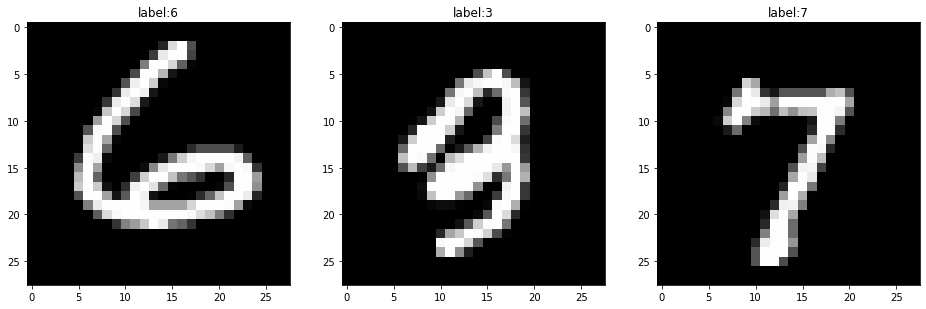

In [12]:
plt.figure(figsize = (16, 7))
for i in range(len(idxes)):
  img = X_train[idxes[i]]
  label = y_train[idxes[i]]

  ax = plt.subplot(1, sample, i+1)
  ax.set_title('label:' + str(label))
  ax.imshow(img, cmap = 'gray')

plt.show()

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state = 2022)

In [14]:
X_train.shape, X_val.shape

((48000, 28, 28), (12000, 28, 28))

In [15]:
X_train = X_train.reshape(-1, 28*28)

In [16]:
X_val = X_val.reshape(-1, 28*28)

In [17]:
X_test = X_test.reshape(-1, 28*28)

In [18]:
np.max(X_train)

255

In [20]:
# 스케일링 (MinMaxScaler) --> (x - x_min)/(x_max-x_min) = x/x_max (x_min = 0이므로)

X_train = X_train/255
X_test = X_test/255
X_val = X_val/255

In [21]:
np.max(X_train), np.min(X_train)

(1.0, 0.0)

In [23]:
# y 데이터 원 핫 인코딩

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
#y_test는 어차피 다시 바꿔줘야하므로 냅두기

In [24]:
y_train.shape, y_val.shape

((48000, 10), (12000, 10))

In [27]:
# 모델 만들기

model = keras.Sequential([
    layers.Dense(64, input_shape=(784,), activation = 'relu'),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')                      
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [28]:
# 모델 컴파일
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate = 0.002)

model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['acc'])

In [29]:
# 모델 학습

EPOCHS = 30
BATCH_SIZE = 128 # 2의 제곱수 많이 사용
history = model.fit(X_train, y_train, epochs = EPOCHS, batch_size = BATCH_SIZE, validation_data = (X_val, y_val))

Epoch 1/30
375/375 [==============================] - 2s 4ms/step - loss: 0.3757 - acc: 0.8883 - val_loss: 0.2060 - val_acc: 0.9403
Epoch 2/30
375/375 [==============================] - 1s 4ms/step - loss: 0.1582 - acc: 0.9531 - val_loss: 0.1549 - val_acc: 0.9543
Epoch 3/30
375/375 [==============================] - 1s 4ms/step - loss: 0.1159 - acc: 0.9651 - val_loss: 0.1350 - val_acc: 0.9602
Epoch 4/30
375/375 [==============================] - 2s 4ms/step - loss: 0.0936 - acc: 0.9714 - val_loss: 0.1276 - val_acc: 0.9647
Epoch 5/30
375/375 [==============================] - 2s 4ms/step - loss: 0.0762 - acc: 0.9771 - val_loss: 0.1119 - val_acc: 0.9675
Epoch 6/30
375/375 [==============================] - 1s 4ms/step - loss: 0.0614 - acc: 0.9816 - val_loss: 0.1197 - val_acc: 0.9671
Epoch 7/30
375/375 [==============================] - 1s 4ms/step - loss: 0.0583 - acc: 0.9821 - val_loss: 0.1151 - val_acc: 0.9679
Epoch 8/30
375/375 [==============================] - 1s 3ms/step - loss: 0.

In [31]:
# 결과 시각화

def plot_history(history):
  hist = history.history
  plt.figure(figsize = (20, 12))
  plt.subplot(1, 2, 1)
  plt.plot(history.epoch, hist['loss'], label = 'loss')
  plt.plot(history.epoch, hist['val_loss'], label = 'val_loss')
  plt.legend()
  plt.subplot(1, 2, 2)
  plt.plot(history.epoch, hist['acc'], label = 'acc')
  plt.plot(history.epoch, hist['val_acc'], label = 'val_acc')
  plt.legend()
  plt.show()

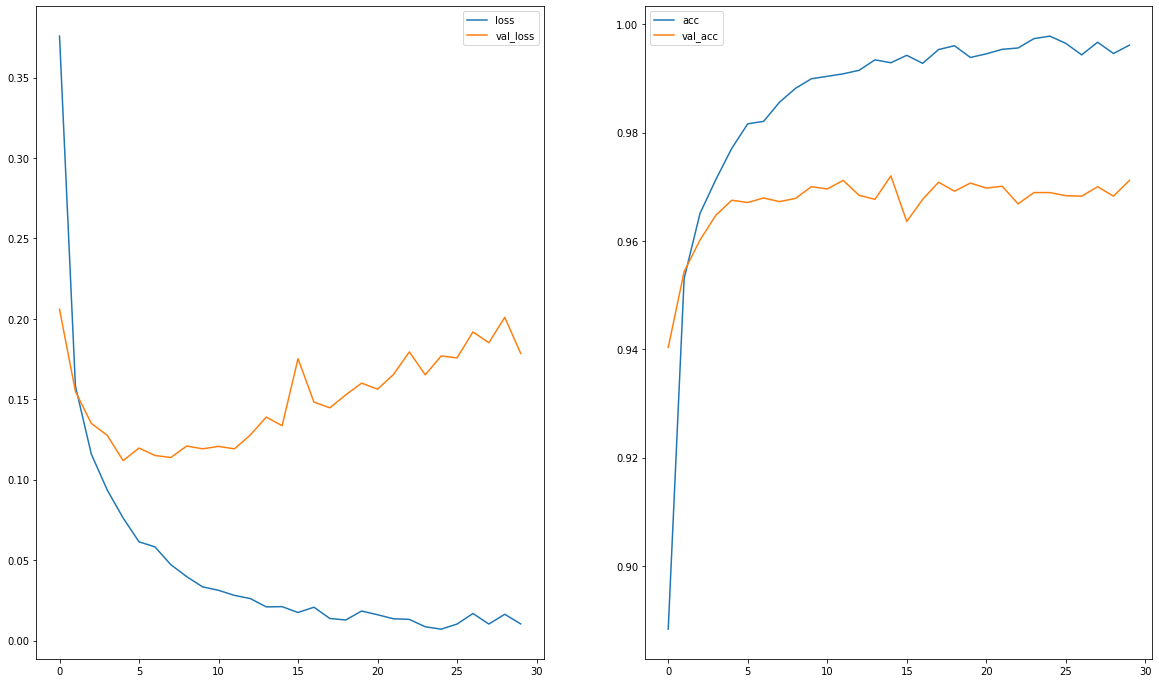

In [32]:
plot_history(history)

In [33]:
# 모델 평가

model.evaluate(X_test, to_categorical(y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.1603 - acc: 0.9740


[0.1603112369775772, 0.9739999771118164]

In [34]:
y_pred = model.predict(X_test)
y_pred[:10]

array([[1.83206093e-16, 4.03668321e-16, 2.92036074e-18, 1.16723458e-13,
        8.77008980e-18, 5.84668710e-18, 8.02670081e-33, 1.00000000e+00,
        1.37069656e-15, 1.73786974e-11],
       [4.40667627e-21, 9.53848805e-11, 1.00000000e+00, 3.91234218e-14,
        2.42288736e-38, 1.32472980e-14, 9.69275136e-21, 6.11469211e-25,
        7.87133542e-13, 2.15129941e-36],
       [5.97660810e-11, 9.99944568e-01, 1.92225289e-05, 2.71619083e-09,
        4.35197522e-09, 6.16121633e-06, 1.32111427e-06, 1.85789686e-05,
        1.01474679e-05, 1.53558687e-12],
       [1.00000000e+00, 1.21333815e-21, 5.14506108e-14, 4.64222073e-18,
        3.06331186e-20, 4.32591968e-18, 1.80365339e-13, 7.13159390e-15,
        3.76445836e-14, 1.01052195e-16],
       [5.38379107e-12, 4.00545119e-20, 9.72488964e-11, 2.46072944e-21,
        9.99227524e-01, 9.72189278e-17, 7.99948239e-17, 6.06157924e-09,
        5.56251460e-16, 7.72436615e-04],
       [4.53335422e-14, 9.99977469e-01, 4.80158556e-13, 6.25863632e-14,
   

In [37]:
y_pred = np.argmax(y_pred, axis = 1)

In [38]:
(y_test == y_pred).sum()/len(y_pred)

0.974

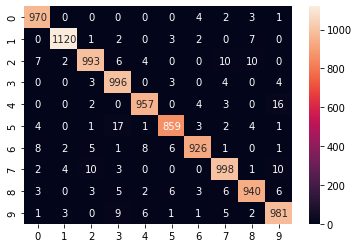

In [42]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, annot = True, fmt = 'd')